## 라이브러리 import

In [1]:
!pip install koreanize-matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import calendar
from pandas.tseries.offsets import MonthEnd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import torch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from torch import nn

## 데이터 불러오기

In [3]:
df_tra = pd.read_csv('/content/drive/MyDrive/새만금/새만금개발청_새만금 방조제 교통량_20230831.csv')
df_per = pd.read_csv('/content/drive/MyDrive/새만금/2022-202306_새만금_공연행사.csv', encoding='euc-kr')
df_fes = pd.read_csv('/content/drive/MyDrive/새만금/2022-202306_새만금_축제현황.csv')

display(df_tra.head())
display(df_per)
display(df_fes)

,조사일 년,조사월,출발,도착지,대형 차량,소형 차량
0,2022,1,부안,군산,1096,32534
1,2022,2,부안,군산,984,29186
2,2022,3,부안,군산,963,27774
3,2022,4,부안,군산,1787,42658
4,2022,5,부안,군산,2210,44554


,행사명,행사시작일,행사종료일,행사 장소,주최,행사 내용,문의처
0,제1회 새만금 드림컵 요트 대회,2022-10-20,2022-10-23,새만금 일원,새만금개발청,딩기요트대회,063-733-1062
1,제7회 새만금 국제 요트대회,2022-07-15,2022-07-17,"부안군 격포항, 고군산군도 일원","전라북도, 부안군",크루징 요트대회,063-584-1005
2,제7회 새만금 어린이 그림그리기공모전,2022-07-18,2022-10-07,새만금 일원,새만금개발청,새만금어린이그림그리기 공모전,02-6953-1410
3,제15회 전국해양스포츠제전,2022-08-12,2022-08-15,"군산 선유도해수욕장, 비응항 일원",해양수산부,"개페회식, 공식경기, 해양체험프로그램, 문화행사",063-454-3298
4,새만금K-POP페스티벌(온라인),2022-08-26,2022-08-27,새만금 신시야미부지,"새만금개발청, 전라북도",K-POP콘서트,063-220-8045
5,자전거 로드 레이스 및 가족러닝 페스티벌,2023-06-17,2023-06-17,새만금 일원,새만금개발청,"자전거 로드 레이스(60㎞) 가족마라톤(하프코스, 5km, 10km)",063-733-1065
6,제8회 새만금 어린이 그림그리기공모전,2023-06-16,2023-08-24,새만금 일원,새만금개발청,새만금어린이그림그리기 공모전,02-6953-1410


,축제명,축제시작일,축제종료일,장소(지역),주관기관,행사내용,전화번호,비고
0,부안마실축제2022(온오프),2022-05-05,2022-05-31,부안군일원,부안군,"별빛마실 점등식, 야간경관, 마실 공모전, 농특산물 특별할인 이벤트, 부안마실 예술...",063-580-4777,NaN
1,김제지평선축제2022,2022-09-29,2022-10-03,벽골제 일원(벽골제중심),김제지평선축제제전위원회,"쌍용놀이/쌍룡횃불놀이, 세계인농경문화체험, 벽골제횃불퍼레이드",063-540-3031,NaN
2,군산시간여행축제2022,2022-10-07,2022-10-10,군산 시간여행마을 일원,군산시간여행축제 추진위원회,"온오프라인 개막식 및 퍼레이드, 시민기획프로그램, 프리마켓, 주전부리부스, 시간여...",063-454-3302,NaN
3,10회 부안마실축제2023,2023-05-04,2023-05-06,부안군일원(주행사장 매창공원),부안군대표축제추진위원회,"야간퍼레이이드-신들의행차, 마마스앤 파파스 뮤직페스티벌, 텃밭할매 팜 파티",063-580-4777,NaN


In [4]:
df_tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   조사일 년   36 non-null     int64 
 1   조사월     36 non-null     int64 
 2   출발      36 non-null     object
 3   도착지     36 non-null     object
 4   대형 차량   36 non-null     int64 
 5   소형 차량   36 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.8+ KB


In [5]:
df_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행사명     7 non-null      object
 1   행사시작일   7 non-null      object
 2   행사종료일   7 non-null      object
 3   행사 장소   7 non-null      object
 4   주최      7 non-null      object
 5   행사 내용   7 non-null      object
 6   문의처     7 non-null      object
dtypes: object(7)
memory usage: 524.0+ bytes


In [6]:
df_fes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   축제명     4 non-null      object 
 1   축제시작일   4 non-null      object 
 2   축제종료일   4 non-null      object 
 3   장소(지역)  4 non-null      object 
 4   주관기관    4 non-null      object 
 5   행사내용    4 non-null      object 
 6   전화번호    4 non-null      object 
 7   비고      0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 388.0+ bytes


## 데이터 전처리

- 축제 시작일, 종료일 -> datetime 형식으로

In [7]:
df_per['행사시작일'] = pd.to_datetime(df_per['행사시작일'])
df_per['행사종료일'] = pd.to_datetime(df_per['행사종료일'])
df_fes['축제시작일'] = pd.to_datetime(df_fes['축제시작일'])
df_fes['축제종료일'] = pd.to_datetime(df_fes['축제종료일'])

- 필요 없는 칼럼 제거

In [8]:
df_per.drop('문의처', axis=1, inplace=True)
df_fes.drop(['전화번호', '비고'], axis=1, inplace=True)

- 비대면 공모전 행사 제거

In [9]:
# '공모전' 포함 행사 제거
exclude_keywords = ['공모전']
mask = df_per['행사명'].str.contains('|'.join(exclude_keywords))
df_per = df_per[~mask].reset_index(drop=True)

- 출발, 도착지 컬럼 통일
  - 군산_부안 컬럼이 1이면 군산 출발, 부안 도착
  - 군산_부안 컬럼이 0이면 부안 출발, 군산 도착

In [10]:
df_tra['군산_부안'] = df_tra.apply(
    lambda row: 1 if row['출발'] == '군산' and row['도착지'] == '부안' else 0,
    axis=1
)
df_tra.drop(['출발', '도착지'], axis=1, inplace=True)
display(df_tra.head())

,조사일 년,조사월,대형 차량,소형 차량,군산_부안
0,2022,1,1096,32534,0
1,2022,2,984,29186,0
2,2022,3,963,27774,0
3,2022,4,1787,42658,0
4,2022,5,2210,44554,0


- 주중, 주말 개수 세기

In [11]:
def count_weekdays_weekends(row):
    year, month = row['조사일 년'], row['조사월']
    _, num_days = calendar.monthrange(year, month)
    weekdays = 0
    weekends = 0
    for day in range(1, num_days + 1):
        weekday = calendar.weekday(year, month, day)
        if weekday < 5:
            weekdays += 1
        else:
            weekends += 1
    return pd.Series({'주중일수': weekdays, '주말일수': weekends})

df_tra[['주중일수', '주말일수']] = df_tra.apply(count_weekdays_weekends, axis=1)
display(df_tra.head())

,조사일 년,조사월,대형 차량,소형 차량,군산_부안,주중일수,주말일수
0,2022,1,1096,32534,0,21,10
1,2022,2,984,29186,0,20,8
2,2022,3,963,27774,0,23,8
3,2022,4,1787,42658,0,21,9
4,2022,5,2210,44554,0,22,9


- 축제 및 공연 장소 컬럼

In [12]:
# 지역 분류 기준 키워드 (행사 장소 + 주최 컬럼 기준)
def classify_region(row):
    region_text = str(row['행사 장소']) + ' ' + str(row['주최'])
    if '부안' in region_text:
        return '부안'
    elif '군산' in region_text:
        return '군산'
    elif '새만금' in region_text:
        return '새만금'
    else:
        return '기타'

df_per['행사지역'] = df_per.apply(classify_region, axis=1)
display(df_per.head())

,행사명,행사시작일,행사종료일,행사 장소,주최,행사 내용,행사지역
0,제1회 새만금 드림컵 요트 대회,2022-10-20,2022-10-23,새만금 일원,새만금개발청,딩기요트대회,새만금
1,제7회 새만금 국제 요트대회,2022-07-15,2022-07-17,"부안군 격포항, 고군산군도 일원","전라북도, 부안군",크루징 요트대회,부안
2,제15회 전국해양스포츠제전,2022-08-12,2022-08-15,"군산 선유도해수욕장, 비응항 일원",해양수산부,"개페회식, 공식경기, 해양체험프로그램, 문화행사",군산
3,새만금K-POP페스티벌(온라인),2022-08-26,2022-08-27,새만금 신시야미부지,"새만금개발청, 전라북도",K-POP콘서트,새만금
4,자전거 로드 레이스 및 가족러닝 페스티벌,2023-06-17,2023-06-17,새만금 일원,새만금개발청,"자전거 로드 레이스(60㎞) 가족마라톤(하프코스, 5km, 10km)",새만금


In [13]:
def classify_region_fes(row):
    region_text = str(row['장소(지역)']) + ' ' + str(row['주관기관'])
    if '부안' in region_text:
        return '부안'
    elif '군산' in region_text:
        return '군산'
    elif '새만금' in region_text:
        return '새만금'
    else:
        return '기타'

df_fes['행사지역'] = df_fes.apply(classify_region_fes, axis=1)
display(df_fes.head())

,축제명,축제시작일,축제종료일,장소(지역),주관기관,행사내용,행사지역
0,부안마실축제2022(온오프),2022-05-05,2022-05-31,부안군일원,부안군,"별빛마실 점등식, 야간경관, 마실 공모전, 농특산물 특별할인 이벤트, 부안마실 예술...",부안
1,김제지평선축제2022,2022-09-29,2022-10-03,벽골제 일원(벽골제중심),김제지평선축제제전위원회,"쌍용놀이/쌍룡횃불놀이, 세계인농경문화체험, 벽골제횃불퍼레이드",기타
2,군산시간여행축제2022,2022-10-07,2022-10-10,군산 시간여행마을 일원,군산시간여행축제 추진위원회,"온오프라인 개막식 및 퍼레이드, 시민기획프로그램, 프리마켓, 주전부리부스, 시간여...",군산
3,10회 부안마실축제2023,2023-05-04,2023-05-06,부안군일원(주행사장 매창공원),부안군대표축제추진위원회,"야간퍼레이이드-신들의행차, 마마스앤 파파스 뮤직페스티벌, 텃밭할매 팜 파티",부안


In [14]:
df_tra['date'] = pd.to_datetime(
    df_tra['조사일 년'].astype(str) + '-' + df_tra['조사월'].astype(str).str.zfill(2) + '-01'
)

In [15]:
from pandas.tseries.offsets import MonthEnd

def count_event_days_in_month(row_date, start_col, end_col, df_event):
    month_start = row_date
    month_end = row_date + MonthEnd(0)

    total_days = 0
    for _, row in df_event.iterrows():
        event_start = row[start_col]
        event_end = row[end_col]
        # 교차 구간 계산
        overlap_start = max(event_start, month_start)
        overlap_end = min(event_end, month_end)
        if overlap_start <= overlap_end:
            days = (overlap_end - overlap_start).days + 1
            total_days += days
    return total_days

In [16]:
df_tra['행사_개최일수'] = df_tra['date'].apply(lambda d: count_event_days_in_month(d, '행사시작일', '행사종료일', df_per))
df_tra['축제_개최일수'] = df_tra['date'].apply(lambda d: count_event_days_in_month(d, '축제시작일', '축제종료일', df_fes))

In [17]:
df_tra['총_행사축제_일수'] = df_tra['행사_개최일수'] + df_tra['축제_개최일수']

In [18]:
# 주중/주말 일수 세는 함수
def count_weekday_weekend_days(start, end):
    weekdays = 0
    weekends = 0
    for d in pd.date_range(start, end):
        if d.weekday() < 5:
            weekdays += 1
        else:
            weekends += 1
    return weekdays, weekends

# 조사 월 기준으로 해당 월 내 주중/주말 행사 일수 합산
def count_event_weekday_weekend_days(row_date, df_event, start_col, end_col):
    month_start = row_date
    month_end = row_date + MonthEnd(0)
    weekday_sum = 0
    weekend_sum = 0

    for _, row in df_event.iterrows():
        event_start = row[start_col]
        event_end = row[end_col]
        # 교차 구간만큼만 고려
        overlap_start = max(event_start, month_start)
        overlap_end = min(event_end, month_end)
        if overlap_start <= overlap_end:
            wd, we = count_weekday_weekend_days(overlap_start, overlap_end)
            weekday_sum += wd
            weekend_sum += we

    return pd.Series([weekday_sum, weekend_sum])

In [19]:
# 공연 행사 기준
df_tra[['행사_주중일수', '행사_주말일수']] = df_tra['date'].apply(
    lambda d: count_event_weekday_weekend_days(d, df_per, '행사시작일', '행사종료일')
)

# 축제 기준
df_tra[['축제_주중일수', '축제_주말일수']] = df_tra['date'].apply(
    lambda d: count_event_weekday_weekend_days(d, df_fes, '축제시작일', '축제종료일')
)

In [20]:
df_tra.head()

,조사일 년,조사월,대형 차량,소형 차량,군산_부안,주중일수,주말일수,date,행사_개최일수,축제_개최일수,총_행사축제_일수,행사_주중일수,행사_주말일수,축제_주중일수,축제_주말일수
0,2022,1,1096,32534,0,21,10,2022-01-01,0,0,0,0,0,0,0
1,2022,2,984,29186,0,20,8,2022-02-01,0,0,0,0,0,0,0
2,2022,3,963,27774,0,23,8,2022-03-01,0,0,0,0,0,0,0
3,2022,4,1787,42658,0,21,9,2022-04-01,0,0,0,0,0,0,0
4,2022,5,2210,44554,0,22,9,2022-05-01,0,27,27,0,0,19,8


## EDA

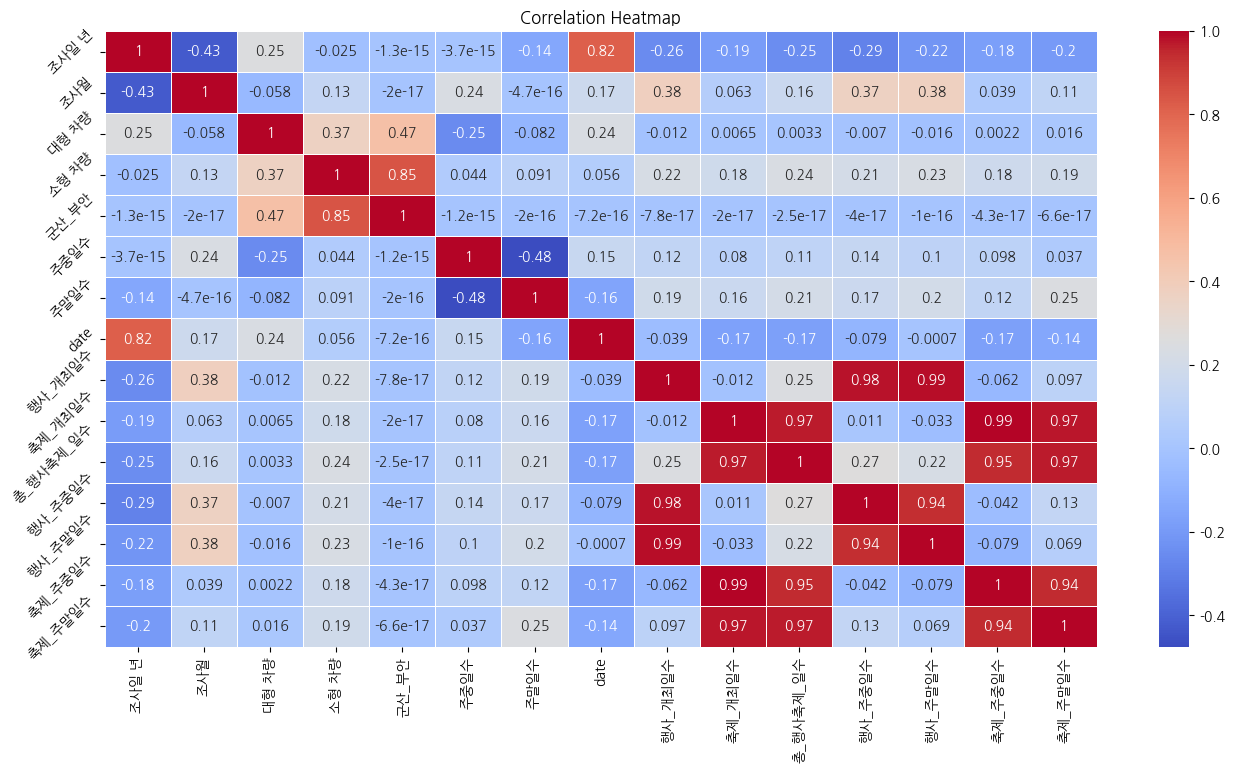

In [21]:
corr = df_tra.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

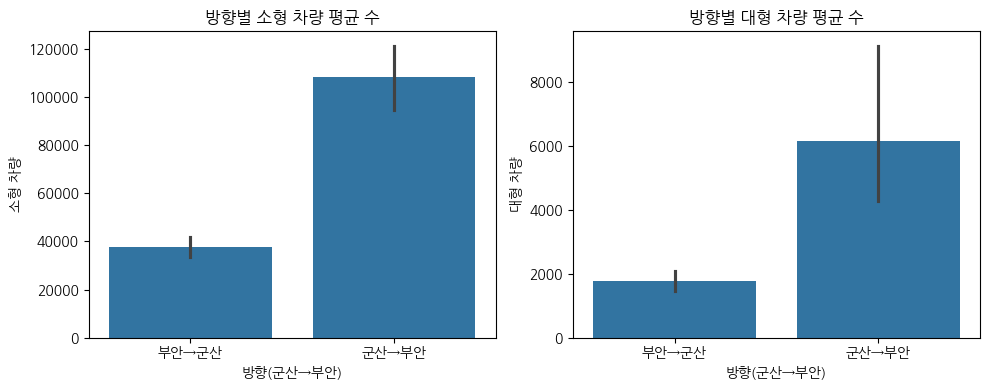

In [22]:
# 군산→부안: 1, 부안→군산: 0
df_tra['방향(군산→부안)'] = df_tra['군산_부안'].map({1: '군산→부안', 0: '부안→군산'})

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.barplot(data=df_tra, x='방향(군산→부안)', y='소형 차량')
plt.title('방향별 소형 차량 평균 수')

plt.subplot(1, 2, 2)
sns.barplot(data=df_tra, x='방향(군산→부안)', y='대형 차량')
plt.title('방향별 대형 차량 평균 수')

plt.tight_layout()
plt.show()


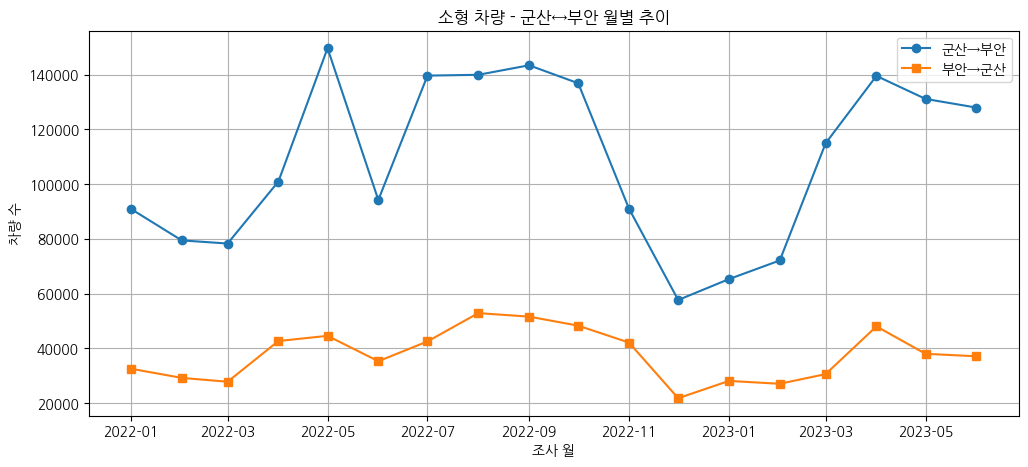

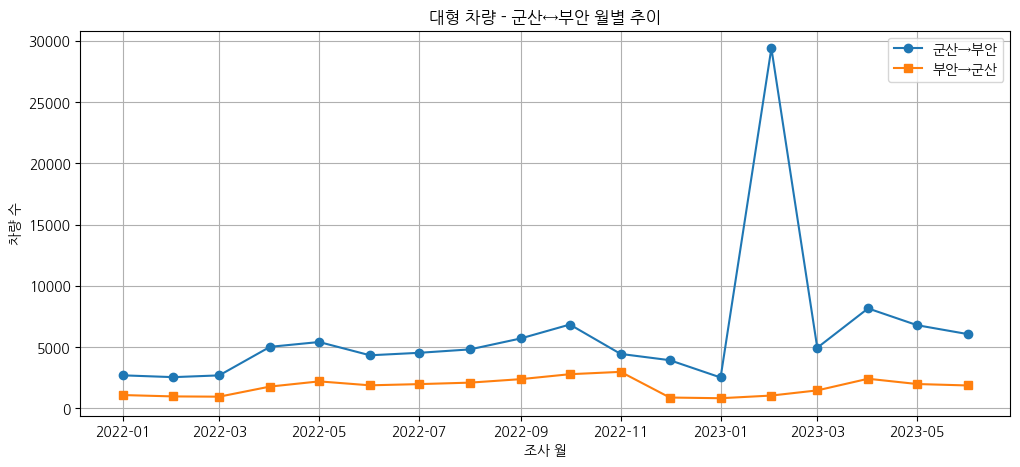

In [23]:
# 군산→부안 = 1 / 부안→군산 = 0 기준 분리
df_gun_buan = df_tra[df_tra['군산_부안'] == 1]
df_buan_gun = df_tra[df_tra['군산_부안'] == 0]

# 차량 유형별 시계열 비교
for vehicle in ['소형 차량', '대형 차량']:
    plt.figure(figsize=(12,5))
    plt.plot(df_gun_buan['date'], df_gun_buan[vehicle], label='군산→부안', marker='o')
    plt.plot(df_buan_gun['date'], df_buan_gun[vehicle], label='부안→군산', marker='s')
    plt.title(f'{vehicle} - 군산↔부안 월별 추이')
    plt.xlabel('조사 월')
    plt.ylabel('차량 수')
    plt.grid(True)
    plt.legend()
    plt.show()


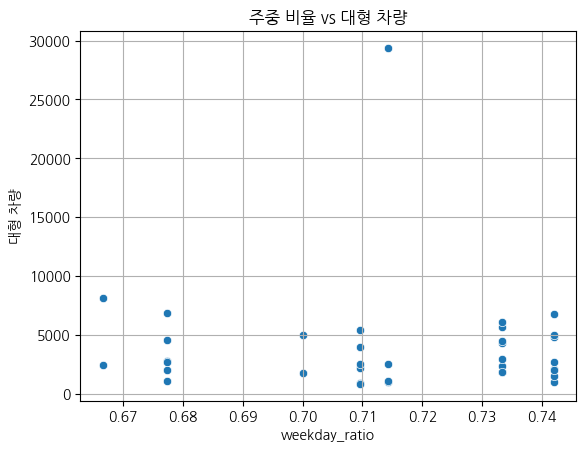

In [24]:
df_tra['weekday_ratio'] = df_tra['주중일수'] / (df_tra['주중일수'] + df_tra['주말일수'])
sns.scatterplot(data=df_tra, x='weekday_ratio', y='대형 차량')
plt.title('주중 비율 vs 대형 차량')
plt.grid(True)
plt.show()

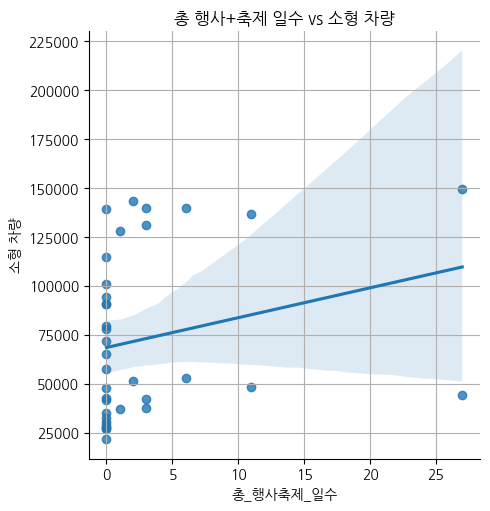

In [25]:
sns.lmplot(data=df_tra, x='총_행사축제_일수', y='소형 차량')
plt.title('총 행사+축제 일수 vs 소형 차량')
plt.grid(True)

# 모델링

### 머신러닝

- 대형, 소형 나눠서

In [26]:
# date, 방향 제거
df = df_tra.drop(columns=['date', '방향(군산→부안)'])

# 입력(X), 출력(y) 분리 - 소형 차량
X = df.drop(columns=['소형 차량', '대형 차량'])
y_small = df['소형 차량']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_small, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)

# 스코어 함수로 R2 사용
scorer = make_scorer(r2_score)

In [29]:
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 21)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # 시도할 조합 수
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_scaled, y_train)

# 최적 모델 추출
best_model = random_search.best_estimator_

# 테스트셋 예측
y_pred = best_model.predict(X_test_scaled)

# MSE, R² 출력
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📌 Best Parameters:", random_search.best_params_)
print("📈 Best R2 Score:", random_search.best_score_)
print("📉 Test MSE:", round(mse, 2))
print("📈 Test R²:", round(r2, 4))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
📌 Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 184}
📈 Best R2 Score: 0.8326476082278542
📉 Test MSE: 543413243.46
📈 Test R²: 0.6267


In [30]:
result_df = pd.DataFrame({
    '실제값': y_test.values,
    '예측값': y_pred
})
display(result_df)

,실제값,예측값
0,127995,126182.036215
1,79449,96524.897943
2,30571,32055.137118
3,65296,109516.934951
4,149697,131508.846250
5,72107,111023.060675
6,136890,125348.838084
7,90950,101732.946480


In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# 최적 모델 추출
best_model = grid_search.best_estimator_

# 테스트셋 예측
y_pred = best_model.predict(X_test_scaled)

# MSE, R² 출력
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📌 Best Parameters:", grid_search.best_params_)
print("📈 Best R2 Score:", grid_search.best_score_)
print("📉 Test MSE:", round(mse, 2))
print("📈 Test R²:", round(r2, 4))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
📌 Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
📈 Best R2 Score: 0.831668111399142
📉 Test MSE: 522693316.11
📈 Test R²: 0.6409


In [32]:
result_df = pd.DataFrame({
    '실제값': y_test.values,
    '예측값': y_pred
})
display(result_df)

,실제값,예측값
0,127995,126009.227756
1,79449,99131.323256
2,30571,32562.880312
3,65296,107567.380512
4,149697,131340.687016
5,72107,109386.788665
6,136890,124266.274972
7,90950,101593.161575
